<a href="https://colab.research.google.com/github/martinpius/Behind-Keras-Layers-and-Models/blob/main/Aliens_Training_loop_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using google colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...Please Load Your Drive...")
def time_fmt(t):
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"
time_fmt(125.8970)

Mounted at /content/drive/
You are using google colab with tensorflow version: 2.4.0


'0: 002: 05.00'

In [39]:
import tensorflow as tf
from tensorflow.keras import layers
import time
import numpy as np

In [40]:
#Training loop from scratch is necessary when implementing your own archtecture with desired features that are not 
#Part of the inbuilts functions (keras method---)
#As a simple example consider a mlp for mnist dataset

Model: "mlp_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_imgs (InputLayer)      [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


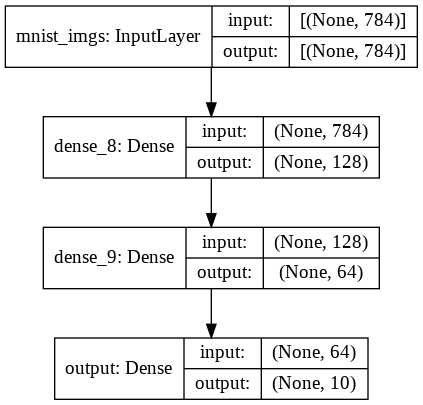

In [41]:
inputs = tf.keras.Input(shape = (784,), name = 'mnist_imgs')
x = layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'random_normal')(inputs)
x = layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'random_normal')(x)
outputs = layers.Dense(units = 10, activation = 'softmax', name = 'output')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mlp_mnist')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mlp_mnist.png', show_shapes = True)

In [42]:
#Loading and pre-process mnist data

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(60000,784).astype('float32')/255.0, x_test.reshape(10000, 784).astype('float32')/255.0

In [44]:
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes = 10), tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [45]:
train_dfm = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dfm = train_dfm.shuffle(buffer_size = 1024).batch(64)
test_dfm = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [46]:
#Getting the loss fn, metric fun to tracking the loss and the optimizer to update the weights
loss_fn = tf.keras.losses.CategoricalCrossentropy()
metric_fn = tf.keras.metrics.CategoricalAccuracy()
val_metric = tf.keras.metrics.CategoricalAccuracy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-3)

In [49]:
#The training loop from scratch:
epochs = 5
tic = time.time()
for epoch in range(epochs):
  print(f"The start of epoch: {epoch}")
  for step, (x_train_batch, y_train_batch) in enumerate(train_dfm):
    with tf.GradientTape() as tape:
      output = model(x_train_batch,training = True)
      loss = loss_fn(y_train_batch, output)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    metric_fn.update_state(y_train_batch,output)
    train_acc = metric_fn.result()
    metric_fn.reset_states()
    if step % 100 ==0:
      print(f"train accuracy at epoch: {epoch} is :{float(train_acc): .4f}")
      print("at step %d:loss = %.4f" % (step, float(loss)))
  
  for step, (x_val_batch, y_val_batch) in enumerate(test_dfm):
    val_logits = model(x_val_batch, training = False)
    val_metric.update_state(y_val_batch, val_logits)
    val_acc = val_metric.result()
    val_metric.reset_states()
    if step % 200 == 0:
      print(f"validation accuracy is:{val_acc}")

toc = time.time()
print(f"Time elapsed is {time_fmt(toc - tic)}")



The start of epoch: 0
train accuracy at epoch: 0 is : 0.9844
at step 0:loss = 0.0366
train accuracy at epoch: 0 is : 0.9844
at step 100:loss = 0.0317
train accuracy at epoch: 0 is : 0.9844
at step 200:loss = 0.0230
train accuracy at epoch: 0 is : 1.0000
at step 300:loss = 0.0004
train accuracy at epoch: 0 is : 1.0000
at step 400:loss = 0.0009
train accuracy at epoch: 0 is : 1.0000
at step 500:loss = 0.0011
train accuracy at epoch: 0 is : 1.0000
at step 600:loss = 0.0036
train accuracy at epoch: 0 is : 1.0000
at step 700:loss = 0.0015
train accuracy at epoch: 0 is : 1.0000
at step 800:loss = 0.0092
train accuracy at epoch: 0 is : 1.0000
at step 900:loss = 0.0007
validation accuracy is:0.984375
The start of epoch: 1
train accuracy at epoch: 1 is : 0.9844
at step 0:loss = 0.0266
train accuracy at epoch: 1 is : 1.0000
at step 100:loss = 0.0120
train accuracy at epoch: 1 is : 1.0000
at step 200:loss = 0.0074
train accuracy at epoch: 1 is : 1.0000
at step 300:loss = 0.0062
train accuracy at 